In [8]:
# by Joh Schoeneberg, 2018
# BSD 3-clause licence

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json

#pyLattice modules / functions
import sys
pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# input

In [9]:
inputParameters = pd.read_csv(pythonPackagePath+'../../input/imaging_data/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)

print(master_outputDataFolder)

inputParameters.style.set_properties(**{'text-align': 'left'})

5689.0
output_560


,key,value
0,inputDataFolder,/Users/johannesschoeneberg/git/pyLattice/input/imaging_data
1,outputDataFolder,/Users/johannesschoeneberg/git/pyLattice/input/imaging_data/output
2,movieLength,10
3,allowedMaxNumDetectionsPerFrame,3000 -- deprecated
4,detectionAmplitudeCutoff,7000
5,framerate_msec,5689
6,detectionFilename,Detection3D.mat
7,trackingFilename,trackedFeatures.mat
8,trackingCsvFilename,trackedFeatures.csv
9,trackingFilenameProcessed,trackedFeaturesProcessed.mat


--- folder searched in: /Users/johannesschoeneberg/git/pyLattice/input/imaging_data
--- example of files found: cropped_560_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
--- number of files found: 10
--- folder searched in: /Users/johannesschoeneberg/git/pyLattice/input/imaging_data
--- example of files found: cropped_488_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
--- number of files found: 10
['cropped_560_pm50px_maxAmpl_0001.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0002.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0003.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0004.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0005.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0006.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0007.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0008.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0009.tif_ratioCorrected.tif'
 'cropped_560_pm50px_maxAmpl_0010.tif_ratioCorrected.tif']
(100, 100, 100)


Text(0.5,0,'xaxis')

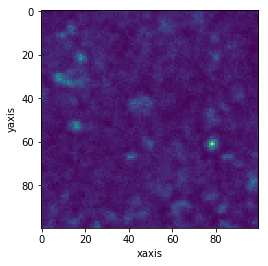

In [78]:
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)

print(master_filesOfInterest)
latticeMovieFrame = skimage.external.tifffile.imread(inputDataFolder+'/'+master_filesOfInterest[5])
print(latticeMovieFrame.shape)
plt.imshow(latticeMovieFrame[50])
plt.ylabel('yaxis')
plt.xlabel('xaxis')

# Crop a volume out of the movie

In [79]:
# input is in [x,y,z], attention: numpy array images are indexed z,y,x
def cropLatticeFrame(frame,center,margin):
    zMax,yMax,xMax = frame.shape
    startx = max(center[0]-margin[0],0)
    endx = min(center[0]+margin[0],xMax)
    
    starty = max(center[1]-margin[1],0)
    endy = min(center[1]+margin[1],yMax)
    
    startz = max(center[2]-margin[2],0)
    endz = min(center[2]+margin[2],xMax)
    
    return frame[startz:endz,starty:endy,startx:endx]

In [81]:
center = np.array([80,65,50])
margin = np.array([25,25,25])

for i in range(0,movieLength):
    print(i)
    
    path = inputDataFolder+'/'+master_filesOfInterest[i]
    #print('ch0',path)
    
    latticeMovieFrame = skimage.external.tifffile.imread(path)
    cropped = cropLatticeFrame(latticeMovieFrame,center.astype(int),margin.astype(int))
    skimage.external.tifffile.imsave(outputDataFolder+'/'+master_outputDataFolder+'/cropped_master_'+str(i).zfill(4)+'.tif', cropped)
    
    path = inputDataFolder+'/'+slave_filesOfInterest[i]
    #print('ch1',path)
    
    latticeMovieFrame = skimage.external.tifffile.imread(path)
    cropped = cropLatticeFrame(latticeMovieFrame,center.astype(int),margin.astype(int))
    skimage.external.tifffile.imsave(outputDataFolder+'/'+slave_outputDataFolder+'/cropped_slave_'+str(i).zfill(4) +'.tif', cropped)
    

0
1
2
3
4
5
6
7
8
9


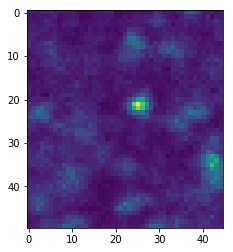

In [77]:
# plot the resulting cropped 
i=0
croppedlatticeMovieFrame = skimage.external.tifffile.imread(outputDataFolder+'/'+master_outputDataFolder+'/cropped_master_'+str(i).zfill(4)+'.tif')
plt.imshow(croppedlatticeMovieFrame[margin[0]])